In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50, MobileNetV2, VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import RandomFlip, RandomRotation
import matplotlib.pyplot as plt

print("This block has finished running!")

This block has finished running!


In [3]:
data_set = './archive'

IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_set,
                                                              image_size=IMG_SIZE,
                                                              batch_size=BATCH_SIZE,
                                                              validation_split=0.2,
                                                              label_mode='int',
                                                              subset='training',
                                                              shuffle=True,
                                                              seed=42)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_set,
                                                              image_size=IMG_SIZE,
                                                              batch_size=BATCH_SIZE,
                                                              validation_split=0.2,
                                                              label_mode='int',
                                                              subset='validation',
                                                              shuffle=True,
                                                              seed=42)


print("This block has finished running!")

Found 15000 files belonging to 3 classes.
Using 12000 files for training.
Found 15000 files belonging to 3 classes.
Using 3000 files for validation.
This block has finished running!


This block has finished running!


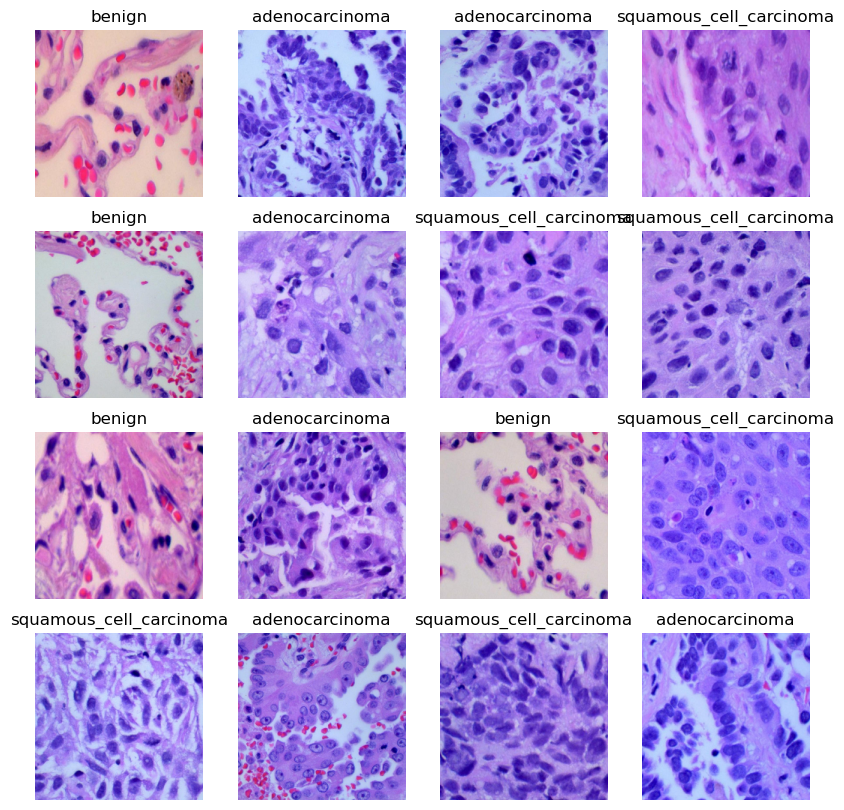

In [7]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
print("This block has finished running!")

In [5]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
print("This block has finished running!")

This block has finished running!


In [7]:
def data_augmenter():
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.2))
    return data_augmentation
print("This block has finished running!")

This block has finished running!


In [50]:
IMG_SHAPE = IMG_SIZE + (3,)
# Have a look on the model!
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')
base_model.summary()
print("This block has finished running!")

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_18[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

This block has finished running!


In [14]:
def cancer_mobile_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):
    input_shape = image_shape + (3,)
    preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')
    
    base_model.trainable = False
    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    x = preprocess_input(x) 

    x = base_model(x, training=False) 

    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    #x = tf.keras.layers.Dropout(rate = 0.2)(x)
        
    outputs = Dense(3, activation='softmax')(x)
    
    
    model = tf.keras.Model(inputs, outputs)
    
    return model
print("This block has finished running!")   

This block has finished running!


In [15]:
mobile_model = cancer_mobile_model(IMG_SIZE,data_augmenter())
base_learning_rate = 0.001
mobile_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
initial_epochs = 5
history = mobile_model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)
print("This block has finished running!")   

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 312s 807ms/step - accuracy: 0.8805 - loss: 0.3043 - val_accuracy: 0.9590 - val_loss: 0.1097
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 265s 705ms/step - accuracy: 0.9601 - loss: 0.1068 - val_accuracy: 0.9683 - val_loss: 0.0866
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 250s 665ms/step - accuracy: 0.9680 - loss: 0.0884 - val_accuracy: 0.9747 - val_loss: 0.0711
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 262s 698ms/step - accuracy: 0.9728 - loss: 0.0764 - val_accuracy: 0.9760 - val_loss: 0.0667
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 253s 674ms/step - accuracy: 0.9775 - loss: 0.0694 - val_accuracy: 0.9793 - val_loss: 0.0592
This block has finished running!


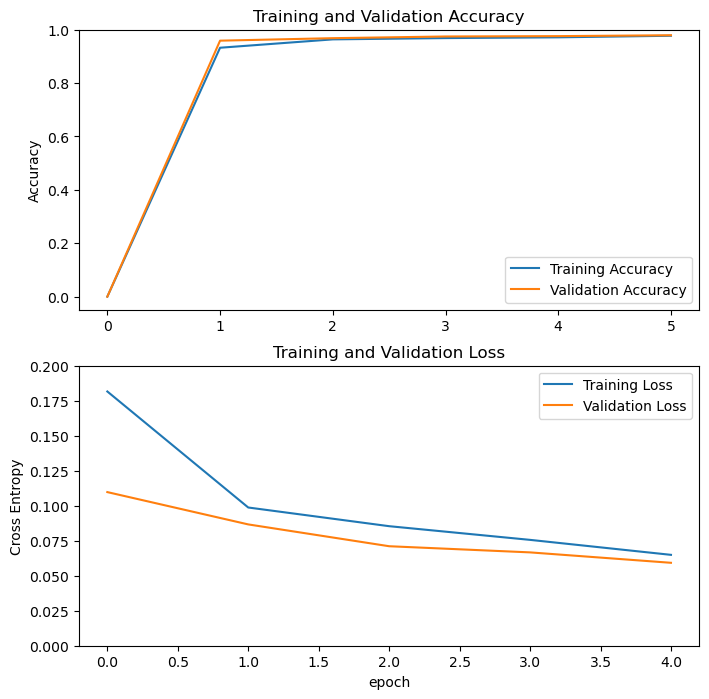

This block has finished running!


In [16]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.2])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
print("This block has finished running!")   

In [17]:
from tensorflow.keras.applications import ResNet50
def cancer_Res50_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):
    input_shape = image_shape + (3,)
    from tensorflow.keras.applications.resnet50 import preprocess_input
    base_model = tf.keras.applications.ResNet50(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')
    
    base_model.trainable = False
    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    x = preprocess_input(x) 

    x = base_model(x, training=False) 

    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    #x = tf.keras.layers.Dropout(rate = 0.2)(x)
        
    outputs = Dense(3, activation='softmax')(x)
    
    
    model = tf.keras.Model(inputs, outputs)
    
    return model
print("This block has finished running!")   

This block has finished running!


In [18]:
res50_model = cancer_Res50_model(IMG_SIZE,data_augmenter())
base_learning_rate = 0.001
res50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
initial_epochs = 5
history = res50_model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)
print("This block has finished running!")   

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1102s 3s/step - accuracy: 0.9103 - loss: 0.2296 - val_accuracy: 0.9610 - val_loss: 0.1005
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1114s 3s/step - accuracy: 0.9684 - loss: 0.0885 - val_accuracy: 0.9697 - val_loss: 0.0744
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1115s 3s/step - accuracy: 0.9757 - loss: 0.0669 - val_accuracy: 0.9633 - val_loss: 0.0806
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1109s 3s/step - accuracy: 0.9774 - loss: 0.0634 - val_accuracy: 0.9800 - val_loss: 0.0561
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1161s 3s/step - accuracy: 0.9813 - loss: 0.0489 - val_accuracy: 0.9700 - val_loss: 0.0696
This block has finished running!


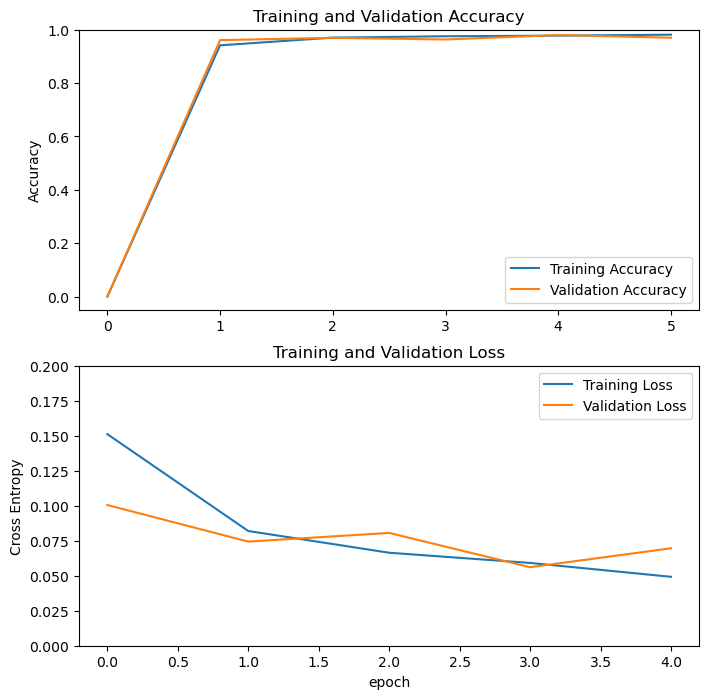

This block has finished running!


In [19]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.2])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
print("This block has finished running!")   

In [36]:
from tensorflow.keras.applications import VGG19
def cancer_VGG19_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):
    input_shape = image_shape + (3,)
    from tensorflow.keras.applications.vgg19 import preprocess_input
    base_model = tf.keras.applications.VGG19(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')
    
    base_model.trainable = False
    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    x = preprocess_input(x) 

    x = base_model(x, training=False) 

    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    #x = tf.keras.layers.Dropout(rate = 0.2)(x)
        
    outputs = Dense(3, activation='softmax')(x)
    
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

print("This block has finished running!")  

This block has finished running!


In [58]:
VGG19_model = cancer_VGG19_model(IMG_SIZE,data_augmenter())
base_learning_rate = 0.001
VGG19_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
initial_epochs = 3
history = VGG19_model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)
print("This block has finished running!")   

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3239s 9s/step - accuracy: 0.7114 - loss: 1.1324 - val_accuracy: 0.9170 - val_loss: 0.2370
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3855s 10s/step - accuracy: 0.9294 - loss: 0.1803 - val_accuracy: 0.9470 - val_loss: 0.1449
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3819s 10s/step - accuracy: 0.9440 - loss: 0.1453 - val_accuracy: 0.9507 - val_loss: 0.1249
This block has finished running!


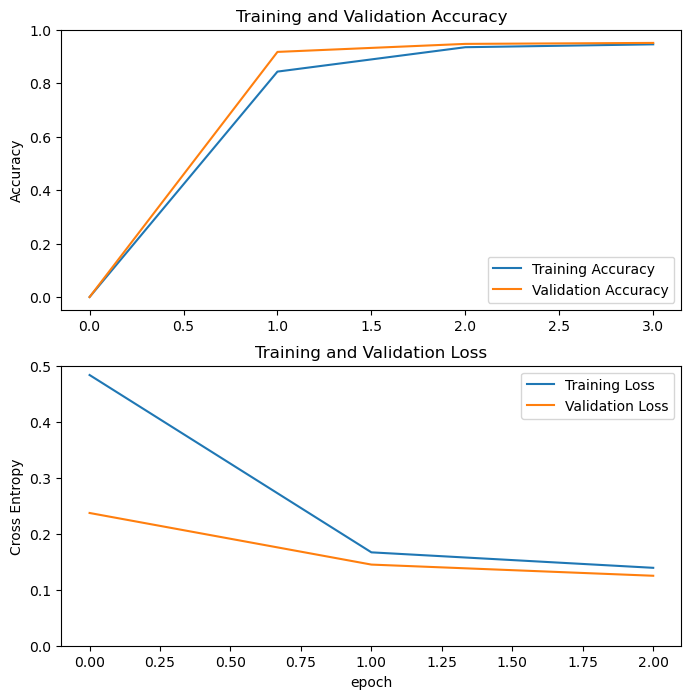

This block has finished running!


In [68]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
print("This block has finished running!")   

In [13]:
from tensorflow.keras.applications import VGG16
def cancer_VGG16_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):
    input_shape = image_shape + (3,)
    from tensorflow.keras.applications.vgg16 import preprocess_input
    base_model = tf.keras.applications.VGG16(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')
    
    base_model.trainable = False
    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    x = preprocess_input(x) 

    x = base_model(x, training=False) 

    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    #x = tf.keras.layers.Dropout(rate = 0.2)(x)
        
    outputs = Dense(3, activation='softmax')(x)
    
    
    model = tf.keras.Model(inputs, outputs)
    
    return model
print("This block has finished running!")  

This block has finished running!


In [15]:
VGG16_model = cancer_VGG16_model(IMG_SIZE,data_augmenter())
base_learning_rate = 0.001
VGG16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
initial_epochs = 3
history = VGG16_model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)
print("This block has finished running!")   

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3018s 8s/step - accuracy: 0.7873 - loss: 0.6153 - val_accuracy: 0.9313 - val_loss: 0.1809
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 2989s 8s/step - accuracy: 0.9371 - loss: 0.1694 - val_accuracy: 0.9487 - val_loss: 0.1401
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 2982s 8s/step - accuracy: 0.9448 - loss: 0.1435 - val_accuracy: 0.9577 - val_loss: 0.1135
This block has finished running!


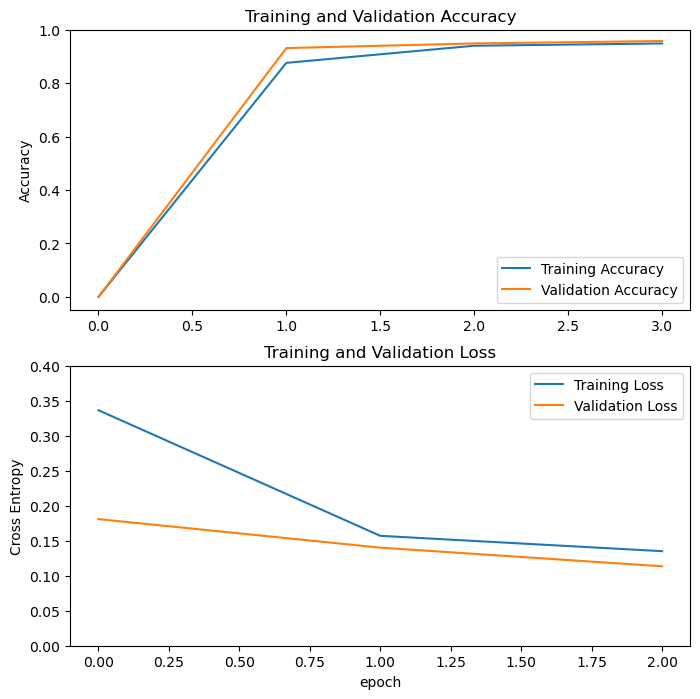

This block has finished running!


In [21]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.4])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
print("This block has finished running!")   

In [23]:
def cancer_AlexNet_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):
    input_shape = image_shape + (3,)

    inputs = tf.keras.Input(shape=input_shape)
    
    # Apply data augmentation
    x = data_augmentation(inputs)

    x = Conv2D(filters=96, kernel_size=(3, 3), strides=(3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    x = Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    x = Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    x = GlobalAveragePooling2D()(x)

    x = Flatten()(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.5)(x)

    x = Dense(64, activation='relu')(x)
    x = Dropout(rate=0.5)(x)

    outputs = Dense(3, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    
    return model
print("This block has finished running!")   

This block has finished running!


In [25]:
AlexNet_model = cancer_AlexNet_model(IMG_SIZE, data_augmenter())
base_learning_rate = 0.001
AlexNet_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=base_learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

initial_epochs = 5
history = AlexNet_model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)
print("This block has finished running!")   

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 927s 2s/step - accuracy: 0.7133 - loss: 0.7288 - val_accuracy: 0.9027 - val_loss: 0.2883
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 925s 2s/step - accuracy: 0.8652 - loss: 0.3483 - val_accuracy: 0.9413 - val_loss: 0.2103
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 986s 3s/step - accuracy: 0.8917 - loss: 0.2826 - val_accuracy: 0.9307 - val_loss: 0.2209
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 974s 3s/step - accuracy: 0.9147 - loss: 0.2385 - val_accuracy: 0.9457 - val_loss: 0.1607
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 960s 3s/step - accuracy: 0.9201 - loss: 0.2120 - val_accuracy: 0.9223 - val_loss: 0.2032
This block has finished running!


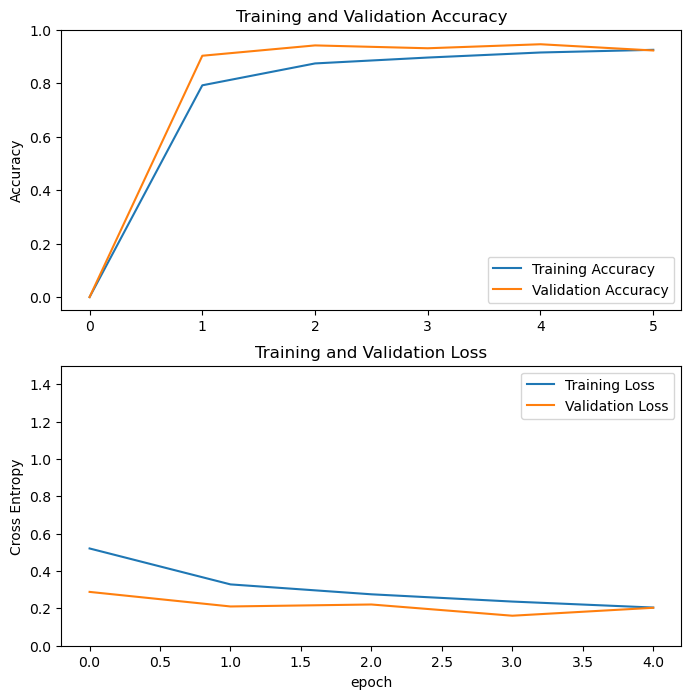

This block has finished running!


In [27]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
print("This block has finished running!")   